# Why I-94 Interstate highway has heavy traffic?

# Table of Contents
- [Introduction](#intro)
- [Analyzing Traffic Volume](#volume)
- [Traffic Volume: Day vs. Night](#daynight)
- [Traffic Volume: Day vs. Night (II)](#daynightii)
- [Time Indicators (Month)](#time)
- [Time Indicators (Day)](#indicatorii)
- [Time Indicators (Time)](#timeiii)
- [Weather Indicators](#weather)
- [Weather Types](#weathertypes)

## Introduction<a id="intro"></a>

Analyzing a dataset about the westbound traffic on the I-94 Interstate highway. 
Dataset can be found at [dataset](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).
Lets, determine a few indicators of heavy traffic on I-94. The indicators can be weather type, time of the day, time of the week, etc. 


Read file Using pandas dataFrame

In [185]:
import pandas as pd

In [186]:
file = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [187]:
file.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [188]:
file.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [189]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


As per the documentation, the station only records westbound Traffic, Ie, cars Moving from east to west. We should avoid Generalizing our results for the entire I-94 highway, thus, results of our analysis will be about the westbound traffic in the proximity of that station.

Lets import matplotlib.pyplot For visual analysis.

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline
# when we use matplotlib inside jupYter, we also need to add the %matplotlib
# inline magic -This enables Jupyter to generate the graphs.
# only once we have to run this line

## Analyzing Traffic Volume<a id="volume"></a>

Plot Histogram to analyze Traffic Volume

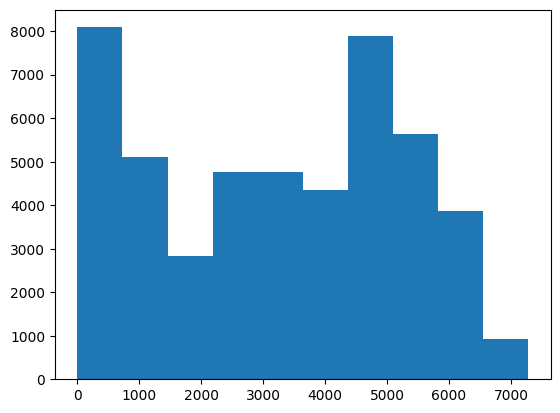

In [191]:
plt.hist(file['traffic_volume'])
plt.show()

Lets see more statistics about traffic_volume

In [192]:
file['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

DaytimeAnd nighttime could influence the traffic volume, the minimum it could get is 0, but, The traffics could reach Up to 7280 In number. The average traffic is seen to be 3259.818355. 
At the peak hour, it might be 4933 normally, yet, it may go up to 7280, the maximum point. 
Maybe, the traffic is influenced more In the day time, Than, the night time. 

# Traffic Volume: Day vs. Night<a id="daynight"></a>

We will Divide the Dataset into two parts:
- Daytime data: hours from 7 am to 7 pm (12 hours)
- Nighttime data: hours from 7 pm to 7 am (12 hours)

- Transforming The date_time column to datetime using pd.to_datetime() 
- Using the series.dt.hour property to get the Hour of every instance of date_time column and isolate Daytime and nighttime data

In [193]:
file['date_time'] = pd.to_datetime(file['date_time'])

In [194]:
file['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int32

In [195]:
#Create daytime and nighttime variables
daytime= file[(file['date_time'].dt.hour >= 7) & (file['date_time'].dt.hour < 19)]

In [196]:
daytime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [197]:
daytime.shape

(23877, 9)

In [198]:
#For nighttime
nighttime = file[(file['date_time'].dt.hour > 19) | (file['date_time'].dt.hour < 7)]

In [199]:
nighttime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11,NaN,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,NaN,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,NaN,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,NaN,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,NaN,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506


In [200]:
nighttime.shape

(22366, 9)

# Traffic Volume: Day vs. Night (II)<a id="daynightii"></a>

We now have daytime and night time data. We shall compare the Traffic volume at night and during day. We will see histogram.We will use grid charts that will ease us to compare the charts.

Text(0, 0.5, 'Frequency')

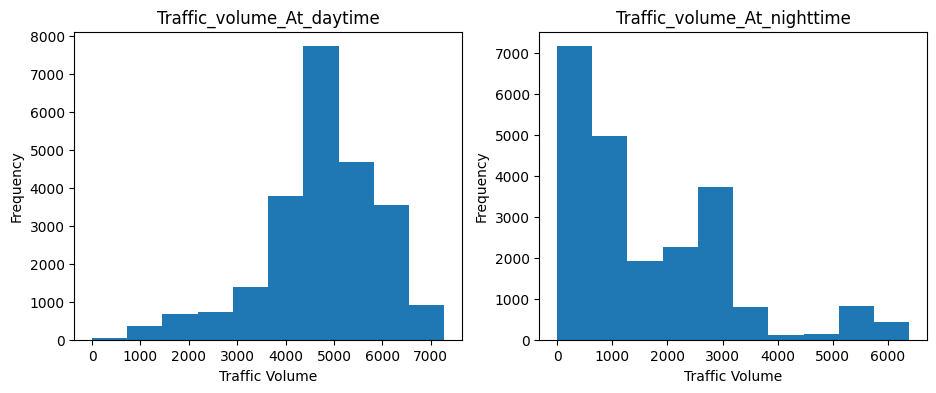

In [201]:
# daytime['traffic_volume'] histogram
plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)
daytime['traffic_volume'].plot.hist()
plt.title('Traffic_volume_At_daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# nighttime['traffic_volume'] histogram
nighttime['traffic_volume'].plot.hist()
plt.title('Traffic_volume_At_nighttime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

In [202]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [203]:
nighttime['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

- The findings tell, the daytime data is left skewed, such that the curve of distrIbution is negative and in average 4758.6 vehicles are seen on street every Hour in the daytime.

- The nighttime data is right skewed, the curve of distribution has positive skewness. The avrage cars on street is up to 2200.8, which is relatively low than daytime, that is the half of the daytime. But, the maximum number of cars seen on street is Close To the daytime traffic, with a little difference.

# Time Indicators (Month)<a id="time"></a>

Our goal is to find indicators of heavy traffic, so we will focus more on the daytime data moving forward since more traffic is focused during the daytime.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

We will use `daytime['date_time'].dt.month` to create a new column where each value describes the month when the traffic volume measurement was taken.

Also, we will use `day.groupby('month').mean(numeric_only=True)` to group the dataset by the month column with the mean as an aggregate function.

In [204]:
daytime.loc[:,'month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

/tmp/ipykernel_41/1068907691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime.loc[:,'month'] = daytime['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<Axes: xlabel='month'>

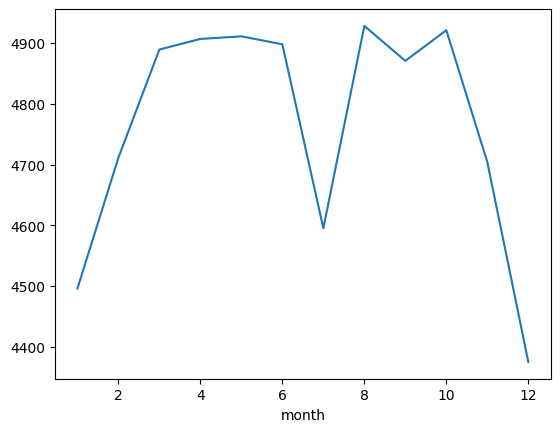

In [205]:
by_month['traffic_volume'].plot.line()

The line plot suggest, the 7th month July is the time when traffic is less, maybe, this is the holiday month when people don'T go out often.
Yet, the traffic is at peak during the 8th, Month, in August. From March to October, traffic are seen to be more, except during July and as the Month of June ends.
The traffic is usually heavier during warm months (March–October) compared to cold months (November–February)

# Time Indicators (Day)<a id="indicatorii"></a>

We will see:
- A line plot to visualize how the traffic volume changed each day of the week on average.
- Analyze the line plot to see the difference between business days and the weekend

In [206]:
#Create new column `dayofweek`
daytime.loc[:, 'dayofweek'] = daytime['date_time'].dt.dayofweek

/tmp/ipykernel_41/37432017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime.loc[:, 'dayofweek'] = daytime['date_time'].dt.dayofweek


In [207]:
#create New dataframe based on the dayofweek On average traffic analysis
by_dayofweek = daytime.groupby('dayofweek').mean(numeric_only=True)

In [208]:
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<Axes: xlabel='dayofweek'>

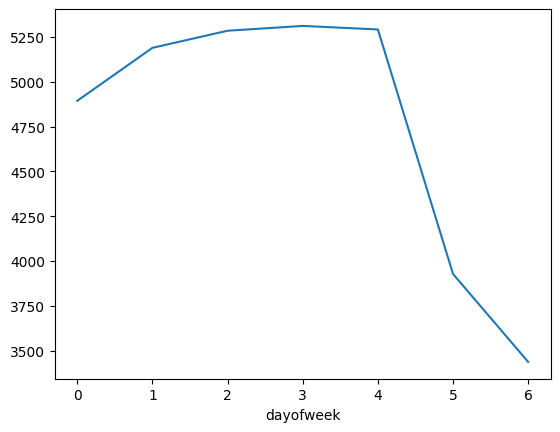

In [209]:
by_dayofweek['traffic_volume'].plot.line()

The business days are the time most traffic are seen On the street, but, the weekends are the days that lesser traffics can be seen on the street. From the 4th day, traffic gradually declines and by the weekend, It can be noticed that there are lesser traffics to worry about.

# Time Indicators (Time)<a id="timeiii"></a>

Now, we will look into the certain time of the day when the traffic could be impressive on the road. First of all, we will split the data based on the day Type: ie, `Business` day or `weekend`.

In [210]:
# hour column created
daytime.loc[:,'hour'] = daytime['date_time'].dt.hour

/tmp/ipykernel_41/670519630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime.loc[:,'hour'] = daytime['date_time'].dt.hour


In [211]:
business_days = daytime.copy()[daytime['dayofweek'] <= 4]
# Monday to friday

weekend = daytime.copy()[daytime['dayofweek'] >= 5]
# Sunday and Saturday

by_hour_business = business_days.groupby('hour').mean(numeric_only=True)

by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

In [212]:
by_hour_business['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [213]:
by_hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

Now we shall have a line plot for both data to visualize how the traffic volume changes by time of the day.

Text(0.5, 1.0, 'Weekend Hours')

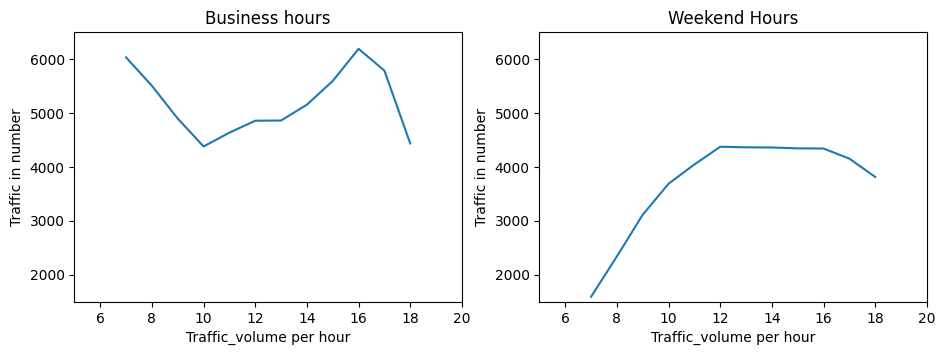

In [214]:
plt.figure(figsize=(11, 3.5))
# Grid box created
# keep all these codes in the same box, otherwise, it will change the visualization

plt.subplot(1, 2, 1)

by_hour_business['traffic_volume'].plot.line()
plt.title('Business hours')
plt.xlim(5, 20)# x Axis range
plt.ylim(1500, 6500)# y Axix range
plt.xlabel('Traffic_volume per hour')
plt.ylabel('Traffic in number')

plt.subplot(1, 2, 2)

by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(5, 20)
plt.ylim(1500, 6500)
plt.xlabel('Traffic_volume per hour')
plt.ylabel('Traffic in number')
plt.title('Weekend Hours')

The graph is now more visually readable. Points to conclude here:
- for business days, 6 to 8 and 15 to 17 are seen to be rush hours
- for weekend days, 12 to 18 could be taken as rush hours.
- The few traffics in the business days are seen highest in nUmber in the weekend days.

# Weather Indicators<a id="weather"></a>

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`
A few of these columns are numerical so let's start by looking up their `correlation values` with `traffic_volume`

In [215]:
file.tail(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [216]:
daytime.corr(numeric_only=True)['traffic_volume']
#without numeric_only, it will error out, as False is default arguement

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

`temp` (temperature) column Has the correlation of 0.128317, And among the weather Column, it seems to be the Strongest. It Shows a Positive correlation of `traffic_volumn` with `temp` column.
Now, lets, plot this column as scatter plot.

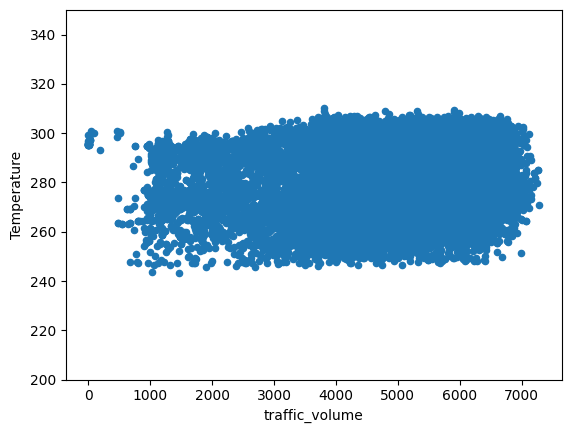

In [217]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(200, 350)
plt.ylabel('Temperature')
plt.show()

It doesn't seem other columns seem like reliable indicators for heavy traffic, but, temparature seems to be a reliable indicator how traffic is influenced.
`weather_main` and `weather_description` columns are yet to be analyzed. We will look into this now.

# Weather Types <a id="weathertypes"></a>

To see if we can find more useful data, we'll look next at the categorical `weather-related columns`: `weather_main` and `weather_description`.
We shall calculate the average traffic volume associated with each unique value in these Two columns.

In [218]:
by_weather_main = daytime.groupby('weather_main').mean(numeric_only=True)
by_weather_description = daytime.groupby('weather_description').mean(numeric_only=True)

<Axes: ylabel='weather_main'>

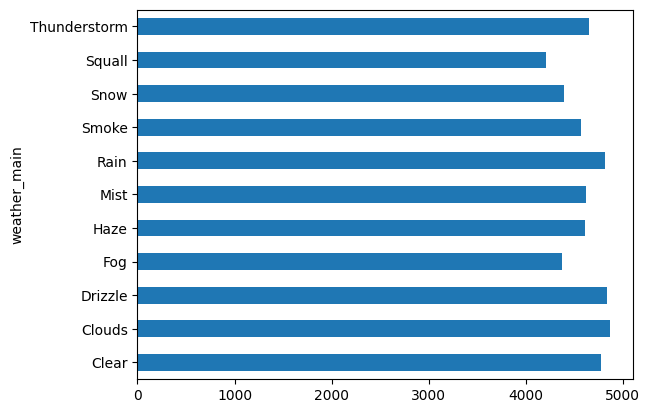

In [221]:
by_weather_main['traffic_volume'].plot.barh()

outputs:
- No traffics exceeds 5000 in number
- `Thunderstorm`, `Rain`, `Drizzle`, `Clouds`, and `Clear` weathers are the signals for heavy traffic signs.

Now, lets see by_weather_description for traffic_volume,

<Axes: ylabel='weather_description'>

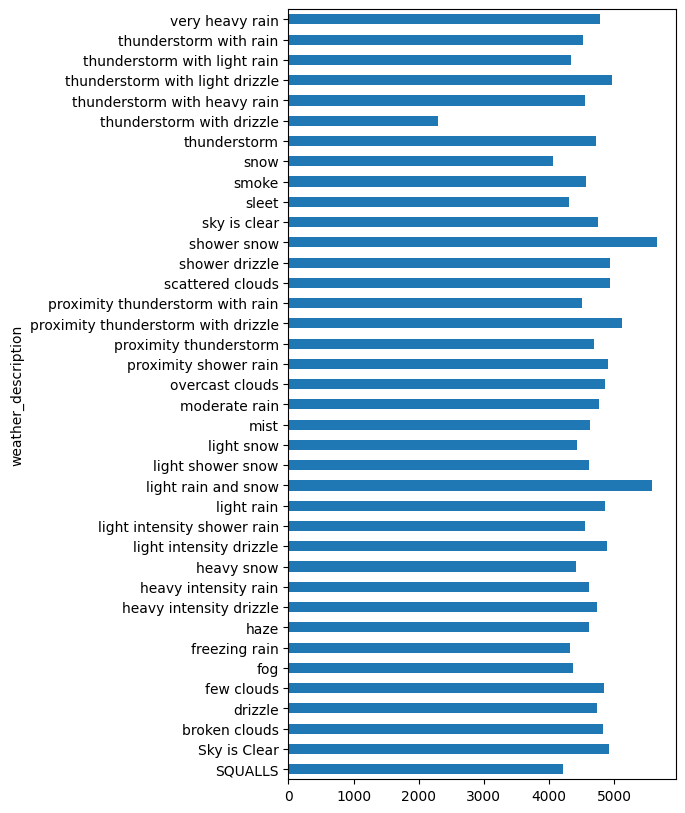

In [236]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
#figsize=(wiDth, height)

`shower snow` and `light rain and snow` are the categories of weather To influence Heavy traffic more than 5000 in numbers.
`thunderstorm with light drizzle` and `proximity thunderstorm with drizzle` are Also seen to exceed 5000.

Now to conclude the Project, we have Findings, that tells, business days are the most affected by the traffics, yet, there are certain hours in a day, that is most affected too.